<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:

# 1. Load and Normalize the Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5361321.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 157433.38it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1274008.26it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7262877.91it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
#Splitting the training, validation, and testing set:

train_size = int(0.8*len(training_data))
val_size = len(training_data)-train_size
train_size, val_size = random_split(training_data, [train_size, val_size])


In [5]:
#Creating a batch_size: using batch 64 as it is commonly used for training models like MNIST

train_loader = DataLoader(train_size, batch_size=64, shuffle=True)
val_loader = DataLoader(val_size, batch_size = 64, shuffle =False)
test_loader = DataLoader(testing_data, batch_size=64, shuffle=False)

In [16]:
#Creating a class that instantiate a CNN module:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels = 32, kernel_size =3, stride=1, padding=0)
    self.pool = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels = 64, kernel_size =3, stride=1, padding=0)
    self.fc1 = nn.Linear(64*5*5, 128)
    self.fc2 = nn.Linear(128, 10)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.5)


  def forward(self, X):
    X = self.pool(self.relu(self.conv1(X)))
    X = self.pool(self.relu(self.conv2(X)))
    X = X.view(-1, 64*5*5)
    X = self.relu(self.fc1(X))
    X = self.dropout(X)
    X = self.relu(self.fc2(X))



    return X





In [17]:
torch.manual_seed(42)
model = CNN()

In [18]:
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [19]:
#Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [20]:
import time

start_time = time.time()
#Create variables to track things

epochs = 10
train_losses =[]
val_losses = []
train_accuracies =[]
val_accuracies = []

for epoch in range(epochs):
  model.train()
  running_loss, correct, total =0.0,0,0
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  train_losses.append(running_loss/len(train_loader))
  train_accuracies.append(100*correct/total)


  model.eval()
  running_loss, correct, total = 0.0,0,0
  with torch.no_grad():
    for images, labels in val_loader:
      outputs = model(images)
      loss = criterion(outputs, labels)
      running_loss +=loss.item()
      _, predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted ==labels).sum().item()
  val_losses.append(running_loss/len(val_loader))
  val_accuracies.append(100*correct/total)

  print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')


current_time = time.time()

total = current_time - start_time

print(f'Training Time: {total/60} Minutes')

Epoch [1/10], Train Loss: 0.3480, Val Loss: 0.0718, Train Acc: 89.55, Val Acc: 97.84
Epoch [2/10], Train Loss: 0.0971, Val Loss: 0.0624, Train Acc: 97.19, Val Acc: 98.10
Epoch [3/10], Train Loss: 0.0687, Val Loss: 0.0456, Train Acc: 97.95, Val Acc: 98.66
Epoch [4/10], Train Loss: 0.0583, Val Loss: 0.0406, Train Acc: 98.30, Val Acc: 98.83
Epoch [5/10], Train Loss: 0.0478, Val Loss: 0.0401, Train Acc: 98.54, Val Acc: 98.83
Epoch [6/10], Train Loss: 0.0407, Val Loss: 0.0347, Train Acc: 98.71, Val Acc: 99.08
Epoch [7/10], Train Loss: 0.0384, Val Loss: 0.0336, Train Acc: 98.87, Val Acc: 99.07
Epoch [8/10], Train Loss: 0.0321, Val Loss: 0.0415, Train Acc: 99.02, Val Acc: 98.99
Epoch [9/10], Train Loss: 0.0297, Val Loss: 0.0391, Train Acc: 99.03, Val Acc: 99.06
Epoch [10/10], Train Loss: 0.0276, Val Loss: 0.0344, Train Acc: 99.16, Val Acc: 99.17
Training Time: 9.031170717875163 Minutes


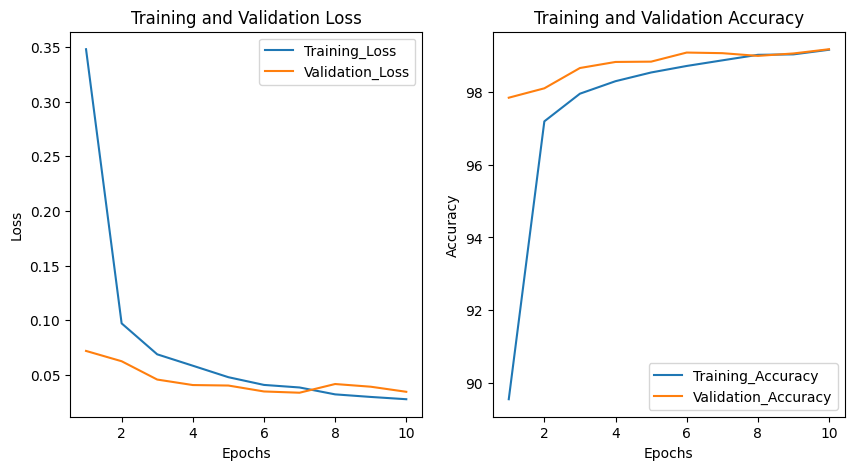

In [21]:
#Plot the training loss and validation loss as a function of epochs.
#Plot the both training accuracy and validation accuracy as a function of epochs

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label ='Training_Loss')
plt.plot(range(1, epochs+1), val_losses, label = 'Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accuracies, label = 'Training_Accuracy')
plt.plot (range(1, epochs+1), val_accuracies, label = 'Validation_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [23]:
# 5. Evaluate on Test Data
model.eval()
correct, total =0,0

with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  test_accuracy = 100*correct/total
  print(f'Test_Accuracy: {test_accuracy:.2f}%')




Test_Accuracy: 99.26%
